In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Ordinary differential equations training

## 1. First training, with  a simple equation


We want to solve the very simple equation :$\frac{dx}{dt}=-kx$, with $x(t=0)=x_0$ as an initial boundary condition.
1) Solve the equation anlaytically and write the solution below x(t)=

$x(t)= x_0e^{-kt}$

To what physical process it would correspond ? What is the dimension of $1/k$ assuming that $t$ is a time ?

In the following we call $f(x,t)$ the derivative $\frac{dx}{dt}=-kx $, so that the system we want to solve can be simply written $\frac{dx}{dt}=f(x,t)$

#### 1.1 Euler solver

Build a function called $deriv(x,t)$ that returns f(x,t). k will be declared as a global variables, defined outside the function $deriv(x,t)$. You can use the following template. Print f for x0=1, t=10., k=1.

In [2]:
def deriv(x,t):
    global k
    return -k*x

x0=1.
t=10.
k=1.
print(deriv(x0,t))

-1.0


Build a simple Euler solver: define dt, and write an iterative procedure that at each time step 
* 1) compute f(x,t)
* 2) increment x according to the Euler scheme : x(t+dt)=x(t)+dt*f(x,t)
* 3) keep in memory the new value of x(t)
* 3) time=time+dt

Of course, before that you must initialize time=0 and x(t=0)=1 


plot the result for dt=0.1 and for time going from 0 to t=5

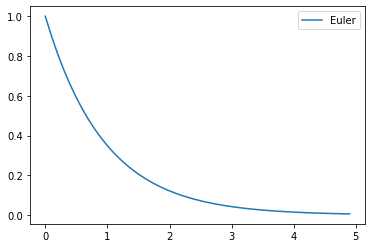

In [3]:
dt = 0.1
t = np.arange(0, 5, dt)
x = np.zeros(len(t))
x[0] = 1
for i in range(len(t)-1):
    x[i+1] = x[i] + dt*deriv(x[i],t[i])
plt.plot(t, x, label='Euler')
plt.legend()

Plot the difference between the numeric solution and the anlytical solution. Do you have comments ?

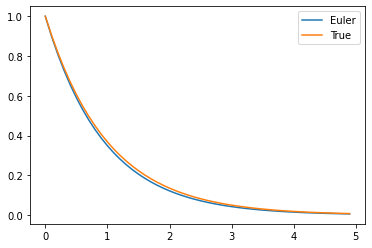

In [4]:
plt.plot(t, x, label='Euler')
plt.plot(t, x[0]*np.exp(-k*t), label = 'True')
plt.legend()

Redo the same exercice for dt=0.2, 0.4, 0.8, 1.6,Comment ?

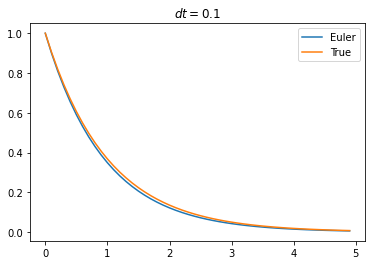

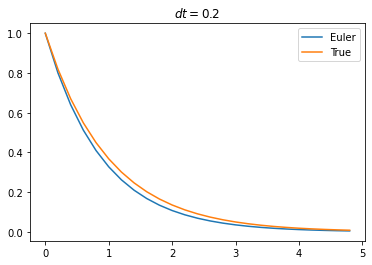

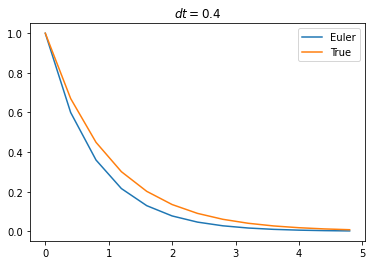

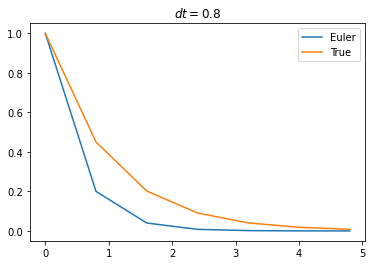

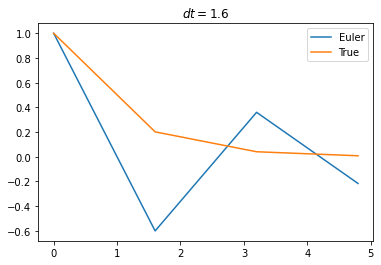

In [5]:
dt = [0.1, 0.2, 0.4, 0.8, 1.6]
for DT in dt:
    t = np.arange(0, 5, DT)
    x = np.zeros(len(t))
    x[0] = 1
    for i in range(len(t)-1):
        x[i+1] = x[i] + DT*deriv(x[i],t[i])
    plt.plot(t, x, label='Euler')
    plt.plot(t, x[0]*np.exp(-k*t), label = 'True')
    plt.title('$dt=$'+str(DT),fontsize=12)
    plt.legend()
    plt.show()

#### 1.2 Second order solver


Redo the same as before, but with the modifed Euler explicit scheme (see lecture)

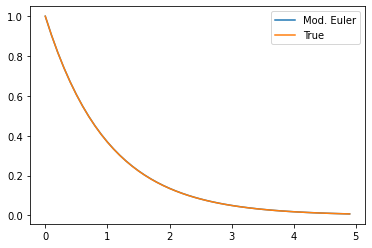

In [6]:
dt = 0.1
t = np.arange(0, 5, dt)
x = np.zeros(len(t))
x[0] = 1
for i in range(len(t)-1):
    k1 = x[i] + dt/2 * deriv(x[i], t[i])
    x[i+1] = x[i] + dt * deriv(k1, t[i]+dt/2)
plt.plot(t, x, label='Mod. Euler')
plt.plot(t, x[0]*np.exp(-k*t), label = 'True')
plt.legend()

## 2 Energy conservative system: orbital motion in 2D (2nd order solver)

We now solve an energy conservative system, with no, or complex solution. We consider the gravity equation of a body with mass body with mass M. The equation of motion is :

$\frac{d^2X }{dt^2}=-\frac{GM}{r^2}\times\frac{X}{r}$


$\frac{d^2Y }{dt^2}=-\frac{GM}{r^2}\times\frac{Y}{r}$




Where G is the universal gravity constant and $r=(X^2+Y^2)^{1/2}$. This is a coupled system of 2 second order equations. Rewrite it as a system of 4 first order equations, using $V_x$ and $V_y$ : the X and Y component of velocity in cartesian coordinates.

The system of 4 first order equations is : 

$\frac{dV_x}{dt}=-\frac{GM}{r^2}\times\frac{X}{r}$

$\frac{dV_y}{dt}=-\frac{GM}{r^2}\times\frac{X}{r}$

$\frac{dx}{dt}=V_x$

$\frac{dx}{dt}=V_y$

We will take the Earth-Moon system (check mass values on internet, work in METRIC SYSTEM UNITS !!) We will consider that the initial position of the moon at time=0 is X=384000km , Y=0, and that its velocity is Vx=0, $Vy=+a \omega $, where $a$ is the inital Earth-Moon distance (called semi-major axis), and $\omega=(GM/a^3)^{1/2}$ is the orbital angular velocity. The orbital period of the Moon, in, in theory should be $T=2\pi/\omega$

Write a function called $gravderiv(X,Y,Vx,Vy,t)$ that returns the derivative of vector (X,Y,Vx,Vy)

In [7]:
def gravderiv(X,Y,Vx,Vy,t):
    dvxdt = -G*M*X/((X**2+Y**2)**(1.5))
    dvydt= -G*M*Y/((X**2+Y**2)**(1.5))
    dxdt = Vx
    dydt = Vy
    return np.array([dxdt, dydt, dvxdt, dvydt])

Write a program that integrate the Moon motion, from time=0 to time=100T, uwint the Modified Euler method.

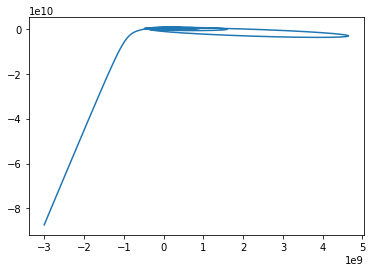

In [11]:
G, M = 6.67408e-11, 5.972e24 
omega = (G*M/384e6**3)**.5
T = 2*np.pi/omega
dt = .1*T
t = np.arange(0, 100*T, dt)
x, y, vx, vy = np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t))
x[0], y[0] = 384e6, 0.
vx[0], vy[0] = 0., x[0]*omega

for i in range(len(t)-1):
    Kder = gravderiv(x[i], y[i], vx[i], vy[i], t[i])
   
    kx = x[i] + dt/2 * Kder[0]
    ky = y[i] + dt/2 * Kder[1]
    kvx = vx[i] + dt/2 * Kder[2]
    kvy = vy[i] + dt/2 * Kder[3]
   
    Kder = gravderiv(kx, ky, kvx, kvy, t[i]+dt/2)
 
    x[i+1] = x[i] + dt * Kder[0]
    y[i+1] = y[i] + dt * Kder[1]
    vx[i+1] = vx[i] + dt * Kder[2]
    vy[i+1] = vy[i] + dt * Kder[3]
plt.plot(x,y)

Use first a time-step dt= 0.01T . Plot the Moon motion X(t), Y(t), Vx(t), Vy(t)

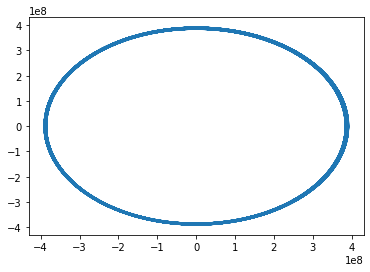

In [13]:
G, M = 6.67408e-11, 5.972e24 
omega = (G*M/384e6**3)**.5
T = 2*np.pi/omega
dt = .01*T
t = np.arange(0, 100*T, dt)
x, y, vx, vy = np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t))
x[0], y[0] = 384e6, 0.
vx[0], vy[0] = 0., x[0]*omega

for i in range(len(t)-1):
    Kder = gravderiv(x[i], y[i], vx[i], vy[i], t[i])
   
    kx = x[i] + dt/2 * Kder[0]
    ky = y[i] + dt/2 * Kder[1]
    kvx = vx[i] + dt/2 * Kder[2]
    kvy = vy[i] + dt/2 * Kder[3]
   
    Kder = gravderiv(kx, ky, kvx, kvy, t[i]+dt/2)
 
    x[i+1] = x[i] + dt * Kder[0]
    y[i+1] = y[i] + dt * Kder[1]
    vx[i+1] = vx[i] + dt * Kder[2]
    vy[i+1] = vy[i] + dt * Kder[3]
plt.plot(x,y)

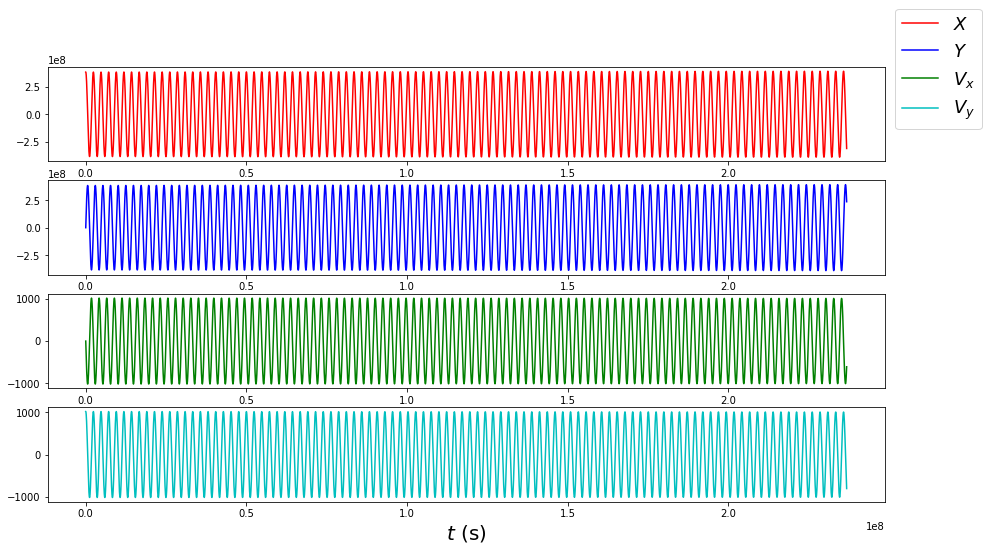

In [14]:
fig, ax = plt.subplots(4, figsize=(15,8))
ax[0].plot(t, x, label='$X$', color='r')
ax[1].plot(t, y, label='$Y$', color='b')
ax[2].plot(t, vx, label='$V_x$', color='g')
ax[3].plot(t, vy, label='$V_y$', color='c')
fig.legend(fontsize=18)
plt.xlabel('$t$ (s)', fontsize=20)
plt.show()

Compute at every time-step the total energy $E_T$ (Kinetic + Potential). Plot energy variations $\Delta_E(t)=\frac{E_T(t)-E_T(t=0)}{E_T(t=0)}$. Is energy really constant ? What happens in your opinion? 

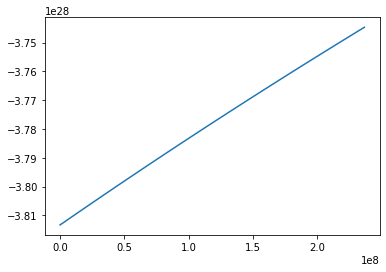

In [15]:
m_moon = 7.34767309e22 
E = lambda x, y, vx, vy ,: -G*M*m_moon/(x**2 + y**2)**.5 + .5*m_moon*(vx**2 + vy**2)
plt.plot(t, E(x, y, vx, vy))

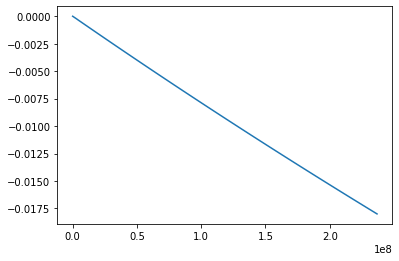

In [16]:
delta_E = (E(x, y, vx, vy) - E(x, y, vx, vy)[0])/E(x, y, vx, vy)[0]
plt.plot(t, delta_E)

Redo the same for dt=0.1T and dt=0.5T: Plot the orbit in (X,Y) frame and $E_T$ as a function of time.

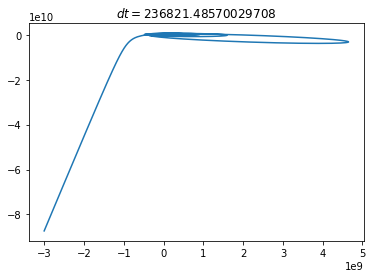

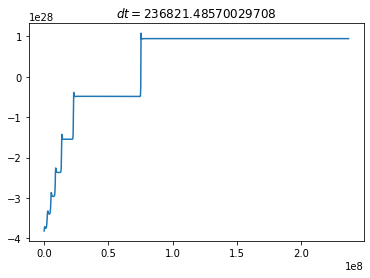

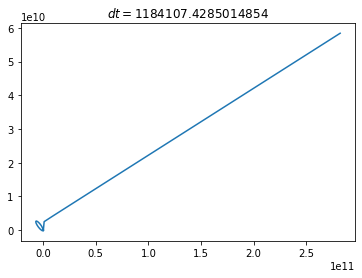

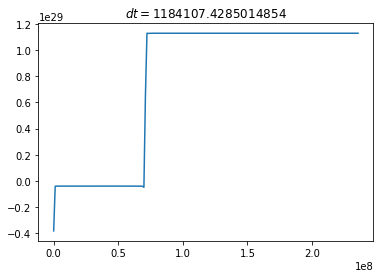

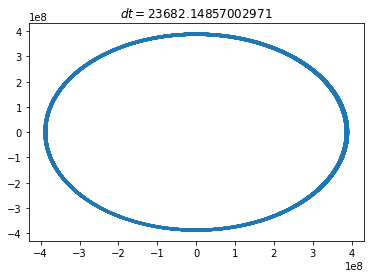

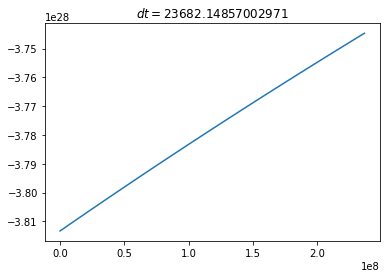

In [17]:
G, M = 6.67408e-11, 5.972e24 
omega = (G*M/384e6**3)**.5
T = 2*np.pi/omega
dt = [.1*T, 0.5*T, 0.01*T]

for j in dt:
    t = np.arange(0, 100*T, j)
    x, y, vx, vy = np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t))
    x[0], y[0] = 384e6, 0.
    vx[0], vy[0] = 0., x[0]*omega

    for i in range(len(t)-1):
        Kder = gravderiv(x[i], y[i], vx[i], vy[i], t[i])
    
        kx = x[i] + j/2 * Kder[0]
        ky = y[i] + j/2 * Kder[1]
        kvx = vx[i] + j/2 * Kder[2]
        kvy = vy[i] + j/2 * Kder[3]
    
        Kder = gravderiv(kx, ky, kvx, kvy, t[i]+j/2)
    
        x[i+1] = x[i] + j * Kder[0]
        y[i+1] = y[i] + j * Kder[1]
        vx[i+1] = vx[i] + j * Kder[2]
        vy[i+1] = vy[i] + j * Kder[3]
    PE = -G*M*m_moon/(x**2 + y**2)**(.5)
    KE = .5*m_moon*(vx**2 + vy**2)
    E = PE+KE
    plt.plot(x,y)
    plt.title('$dt=$'+str(j))
    plt.show()
    plt.plot(t,E)
    plt.title('$dt=$'+str(j))
    plt.show()

Conclusion : What time-step should you use ? 

$dt = 0.01T$

How to control the quality of your solution  in your opinion?

Now, let's considere a more complicated orbit. Start the same integration, but now the initial velocity has a small X component initially à t=0: $Vx=e V_y$, $Vy=+a \omega $, with $abs(e) < 1$. Choose e=0.01 and then e=0.1.

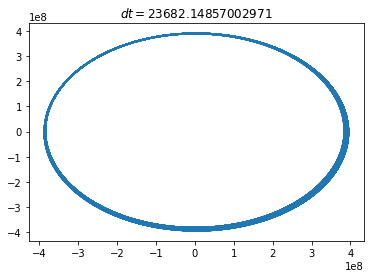

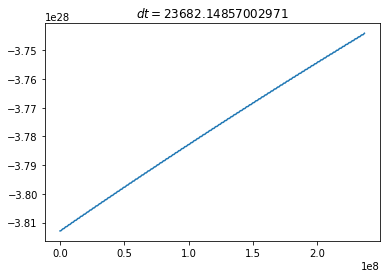

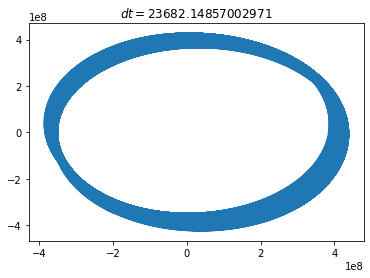

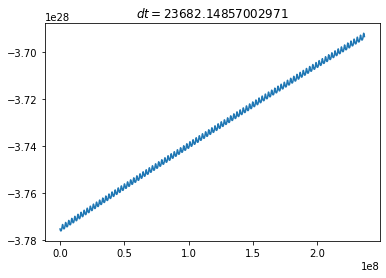

In [ ]:
G, M = 6.67408e-11, 5.972e24 
omega = (G*M/384e6**3)**.5
T = 2*np.pi/omega
dt = .01*T
t = np.arange(0, 100*T, dt)
x, y, vx, vy = np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t))
x[0], y[0] = 384e6, 0.
vy[0] = x[0]*omega
for e in [0.01, 0.1]:
    vx[0] = e*vy[0]
    for i in range(len(t)-1):
        Kder = gravderiv(x[i], y[i], vx[i], vy[i], t[i])
    
        kx = x[i] + dt/2 * Kder[0]
        ky = y[i] + dt/2 * Kder[1]
        kvx = vx[i] + dt/2 * Kder[2]
        kvy = vy[i] + dt/2 * Kder[3]
    
        Kder = gravderiv(kx, ky, kvx, kvy, t[i]+dt/2)
    
        x[i+1] = x[i] + dt * Kder[0]
        y[i+1] = y[i] + dt * Kder[1]
        vx[i+1] = vx[i] + dt * Kder[2]
        vy[i+1] = vy[i] + dt * Kder[3]
    PE = -G*M*m_moon/(x**2 + y**2)**(.5)
    KE = .5*m_moon*(vx**2 + vy**2)
    E = PE+KE
    plt.plot(x,y)
    plt.title('$dt=$'+str(j))
    plt.show()
    plt.plot(t,E)
    plt.title('$dt=$'+str(j))
    plt.show()

Display energy variations for e=0.01 and then e=0.1. What do you see ?

Multiple oscillations with energy for different values of $e$. Also the orbit is not stable

## 3 Energy conservative system 2 : going to 4th order

Reuse the function that computes the derive in case of planetary motion (exercice 2). Now change the solver and code a Runge Kutta 4 scheme, that is 4th order. Put your code below. 

In [ ]:
def gravderiv(X,Y,Vx,Vy,t):
    dvxdt = -G*M*X/((X**2+Y**2)**(1.5))
    dvydt= -G*M*Y/((X**2+Y**2)**(1.5))
    dxdt = Vx
    dydt = Vy
    return np.array([dxdt, dydt, dvxdt, dvydt])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


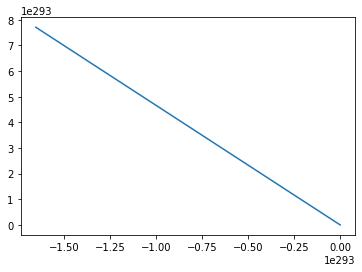

In [ ]:
G, M = 6.67408e-11, 5.972e24 
omega = (G*M/384e6**3)**.5
T = 2*np.pi/omega
dt = .1*T
t = np.arange(0, 100*T, dt)
x, y, vx, vy = np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t))
x[0], y[0] = 384e6, 0.
vy[0] = x[0]*omega

for i in range(len(t)-1):
    K1der = gravderiv(x[i], y[i], vx[i], vy[i], t[i])

    k1x = x[i] + dt * K1der[0]
    k1y = y[i] + dt * K1der[1]
    k1vx = vx[i] + dt * K1der[2]
    k1vy = vy[i] + dt * K1der[3]

    K2der = gravderiv(x[i]+k1x, y[i]+k1y, vx[i]+k1vx, vy[i]+k1vy, t[i]+dt)

    k2x = x[i] + dt * K2der[0]
    k2y = y[i] + dt * K2der[1]
    k2vx = vx[i] + dt * K2der[2]
    k2vy = vy[i] + dt * K2der[3]

    x[i+1] = x[i] + .5*(k1x + k2x)
    y[i+1] = y[i] + .5*(k1y + k2y)
    vx[i+1] = vx[i] + .5*(k1vx + k2vx)
    vy[i+1] = vy[i] + .5*(k1vy + k2vy)

plt.plot(x,y)

Using the same time-steps as before, plot the motion of the moon, and now compute and display energy variations as a function of time.

It may be also interesting to plot the angular momentum of the Moon as a function of time. This should be also conserved. Is it the case ?

## 4 : Interest of implicit solver ! Free-Fall in a viscous fluid

We consider the motion of a particle with mass m, radius r free-faling in a fluid. The particle is inserted at altitude Z with 0 velocity initially.  It suffers the weight force ($Fg=-mg$) plus a friction force, the "Stokes Force", so that :

$F_S =-6\pi \mu r v$

with $\mu$ is the fluid dynamical viscosity (in $Pa S$) , r is the particle radius, and v is its velocity (positive when directed upward, negative when directed downward, so that the Z axis is directed upward by convention)

We solve the system of equation $\frac{dZ}{dt}=?$ and $\frac{d V_Z }{dt}=?$

Write the system of equation we want to  solve. We call U the vector U(t)=(Z(t),$V_z(t)$)

Write a function call Deriv_free_fall$(U,t)$ that returns $\frac{dU}{dt}$

Solve the motion of the particle, using $\mu=2\times 10^{-5} kg/m/s$ (dynamic viscosity of air) and for r=10cm, and $m=1kg$. Plot Z(t) and Vz(t) 

What is the terminal velocity $V_T$ ? 

What is the coupling timescale $\tau$ (time necessary for the particle to reach 1/2 of $V_T$)

Now try to integrate the motion with dt=0.5 $\tau$  ? What happen ?

In order to cure that problem, we want to switch to an IMPLICIT EULER METHOD (1st order).
Write the Euler implicit numerical scheme  ($U_{n+1}=$ a function of $U_{n+1}$ and $U_n$)

By solving analytically the above equation, derive an equation allowing to compute $U_{n+1}$ as a function of $U_n$

Write a code that solve implicitely the motion of the particle in the viscous fluid.

Try different timesteps from 0.1$\tau$ to 2$\tau$ ? Does the integration breaks even for big timestep ?


THIS IS THE MAGIC OF IMPLICIT SOLVERS !